# HW5: Learning Classifier Weights using Perceptron Learning and Gradient Descent

Blanca Miller
2.08.2018
CS 791

__Objective:__ 
- Generate a data set composed of classified points where each data vector is made up of a position and classification.
- part a) Find a separating hyperplane using perceptron learning algorithm using a step function. Measure the run time for 10, 50 & 100 points. 
- part b) Find a separating hyperplane using gradient descent using a sigmoid function. Measure the run time for 10, 50, & 100 points. 
- Does the run time increase linearly? Explain.

Weights map inputs to outputs, thus classifying a set of inputted data. The perceptron learning algorithm (PLA) always finds a hyperplane in a fininte amount of iterations, if a data set is linearly separable. Greadient descent finds the minimun of a function the (non-linear separability) 


with a step function using the thresholded outputs. 

__Given:__
    - input vector: xi
    - target/label: y
    - learning rate/eta: η 
    - weight: wi
    - predicted label: y_hat

__Perceptron Learning Algorithm:__
    - (o) output calculation/activation: y_hat = ∑ wi * xi , where y_hat >= 0 or y_hat < 0
    - weight calculation: wi = wi + Δwi
    - weight change: Δwi = η(y - y_hat) * xi
    
__Gradient Descent:__
    - Learning Rate: Used to limit the amount each weight is corrected for each update
    - Epochs: The number of times to run through the training data while updating the weight
    - 


## Import Libraries

In [1]:
import numpy as np
import random
from numpy import dot
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

## Randomly Generate & Plot a data set & labels where n=100

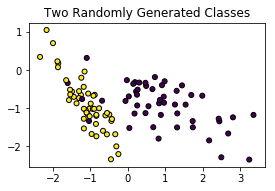

In [2]:
plt.figure(figsize=(8,8))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)

plt.subplot(322)
plt.title("Two Randomly Generated Classes")
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1)
plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=25, edgecolor='k')
plt.show()

In [3]:
#print(X)
#print(y)

# PART A

## Perceptron Learning Algorithm

In [4]:
# set the step function
step = lambda x: 0 if x < 0 else 1

# choose a number of random weights between 0 & 1
w =  np.random.rand(2)

# initialie an error list, a learning rate, and a variable for the number of samples 
errors = []
eta = 0.2
n = 100

#try to reduce the error magnitude to zero 
for i in range(n):
    
    # choose a random input from the data set
    rand = random.randrange(0, 99, 1)
    x = X[rand]
    label = y[rand]
    
    # compute the dot product of the weight and input vector
    result = dot(w, x)
    
    # compare the expected label to the predicted label
    error = label - step(result)
    
    # store errors to list to plot afterwards
    errors.append(error)
    w += eta * error * x

    print("x: {} , y: {} , result: {} , error: {} , weight: {}".format(x, label, result, error, w))

x: [-1.44197953 -0.69901428] , y: 1 , result: -1.32753982931 , error: 1 , weight: [ 0.20714637  0.73711487]
x: [ 3.236635   -2.34398288] , y: 0 , result: -1.0573274552 , error: 0 , weight: [ 0.20714637  0.73711487]
x: [-0.68947468 -0.80104908] , y: 0 , result: -0.733287361548 , error: 0 , weight: [ 0.20714637  0.73711487]
x: [ 1.69050432 -0.65134746] , y: 0 , result: -0.129936065852 , error: 0 , weight: [ 0.20714637  0.73711487]
x: [ 0.8783011  -1.17290991] , y: 0 , result: -0.682632454646 , error: 0 , weight: [ 0.20714637  0.73711487]
x: [ 0.71981761 -0.18159165] , y: 0 , result: 0.0152536953981 , error: -1 , weight: [ 0.06318284  0.7734332 ]
x: [-0.3090073  -1.99693293] , y: 1 , result: -1.56401818951 , error: 1 , weight: [ 0.00138138  0.37404661]
x: [-2.17030228  1.05236464] , y: 1 , result: 0.390635408371 , error: 0 , weight: [ 0.00138138  0.37404661]
x: [-0.91911837 -0.67038252] , y: 1 , result: -0.252023968517 , error: 1 , weight: [-0.18244229  0.23997011]
x: [ 2.16665423 -1.8414

## Plot the PLA Errors

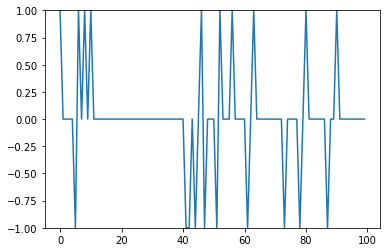

In [5]:
from pylab import plot, ylim
ylim([-1,1])
plot(errors)
plt.show()

# PART B

## Gradient Descent 

In [6]:
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i]
    return 1.0 if activation >= 0.0 else 0.0

In [7]:
def train_weights(train, l_rate, n_epoch):
    weights = [0.0 for i in range(len(train[0]))]
    epoch = 0
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights)
            error = row[-1] - prediction
            sum_error += error**2
            weights[0] = weights[0] + l_rate * error
            for i in range(len(row)-1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
    print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    return weights

In [10]:
for t in range(X.shape[0]): 
    predict(X[i], weights)

NameError: name 'weights' is not defined